In [679]:
%matplotlib inline 
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import os
import io
import pathlib
import requests
import time
import json
import csv
from IPython.display import HTML
import seaborn as sns
from copy import deepcopy



# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#full_api_url = api + str(city_id) + '&mode=json&units=' + unit + '&APPID=' + user_api
apikey = api_keys.api_key
#api_address = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key + '&q=' 

## Generate Cities List

In [680]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
elements=np.array(cities)
#print(elements)

#print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [681]:
# OpenWeatherMap API Key

apikey = api_keys.api_key
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#api_address = 'http://api.openweathermap.org/data/2.5/weather?Imperial&APPID=' + api_key + '&q='
#for city in cities:
#    print(city)
#url =  api_address + city
#json_data=requests.get(url).json() 

#&units=imperial&appid=

def weather_get(apikey, city,nn,newn):
   
    n2=(newn-nn)*-1
    r = requests.get('http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&APPID={}'.format(city, apikey))
    a='http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&APPID={}'.format(city, apikey)
    global table
    table.append(a)
    table.append('processing Record {} of {} | {}'.format(n2,nn,city)+'\n')
    #print('http://api.openweathermap.org/data/2.5/weather?q={}&units=imperial&APPID={}'.format(city, apikey))
    #print('processing Record {} of {} | {}'.format(n2,nn,city))
    if r.status_code == 404:
        #print("City not found. Skipping...")
        table.append("City not found. Skipping..."+'\n')
       
    return(r.json(),table)

def time_convert(unix_stamp):
    unix_timestamp  = int(unix_stamp)
    utc_time = time.gmtime(unix_timestamp)
    local_time = time.localtime(unix_timestamp)
    return(time.strftime("%Y-%m-%d %H:%M:%S", local_time))

#print(time.strftime("%Y-%m-%d %H:%M:%S+00:00 (UTC)", utc_time))
table=[]
temps=[]
temp_maxs=[]
humiditys=[]
lons =[]
lats =[]
cloudss= []
speeds= []
citis=[]
udates=[]
hdates=[]
countries=[]

counter=0

pathlib.Path('/Users/ghassan/HOME-WORK-BC/WEEK6-HW/Instructions/starter_code/output_data').mkdir(parents=True, exist_ok=True)
for city in elements:
    newn=len(elements)+counter
    json_data,table=weather_get(apikey,city,len(elements),newn)
    
#    print(table)
#   print(len(elements),len(table))
    try:
            temp=json_data['main']['temp']
            temp_max=json_data['main']['temp_max']
            udate=json_data['dt']
            hdate=time_convert(udate)
            speed=json_data['wind']['speed']
            lon=json_data['coord']['lon']
            lat=json_data['coord']['lat']
            clouds=json_data['clouds']['all']
            humidity=json_data['main']['humidity']
            country=json_data['sys']['country']
            if city in elements:
                temps.append(temp)
                temp_maxs.append(temp_max)
                humiditys.append(humidity)
                lons.append(lon)
                lats.append(lat)
                cloudss.append(clouds)
                speeds.append(speed)
                citis.append(city)
                udates.append(udate)
                hdates.append(hdate)
                countries.append(country)
    except:
        pass
    counter -=1       
    newn=newn+counter
    
    
#print(countries) 

weather_df = pd.DataFrame({'City': citis,
     'Lng': lons,
     'Lat': lats,
      'Temperature': temps,
      'Cloudiness': cloudss,
      'Humidity': humiditys,
      'Unix Dates': udates,
      'hdate': hdates,
      'Country': countries, 
      'Max Temperature (F)': temp_maxs,
      'Wind Speed': speeds })
weather_df = weather_df.set_index("City")
#weather_df =weather_df [['City','Country','Lng','Lat','Date','Wind Speed','Temperature (F)','Humidity','Cloudiness']]
display(weather_df.head(10))
#display(weather_df.describe())
#print(lon,lat,temp,pressure,humidity,speed,clouds,str(city))
 
list1=[]
#if len(elements)==len(table):
#list1.append(deepcopy(table))
#print(list1)
output_data_file ="output_data/cities.csv"
fileout=open(output_data_file,'w',newline='')  
w = csv.writer(fileout, delimiter = ',')

w.writerows([table])
fileout.close()

    



Cloudiness Country  Humidity    Lat     Lng  \
City                                                         
cape town              20      ZA        58 -33.93   18.42   
anton lizardo          75      MX        88  19.05  -95.98   
thompson               75      CA        88  55.74  -97.86   
busselton              88      AU        99 -33.64  115.35   
rabo de peixe          75      PT        65  37.80  -25.58   
puerto ayora           20      EC        96  -0.74  -90.35   
rikitea                80      PF       100 -23.12 -134.97   
bjornevatn             20      NO        48  69.67   29.98   
prince rupert          90      CA       100  54.32 -130.32   
vaini                  92      IN        99  15.34   74.49   

               Max Temperature (F)  Temperature  Unix Dates  Wind Speed  \
City                                                                      
cape town                    57.20        57.20  1533736800       16.11   
anton lizardo                75.20        75.20  1533739320        2.17   
thompson                     62.60        62.60  1533740400        8.05   
busselton                    61.07        61.07  1533741618       30.80   
rabo de peixe                78.80        78.80  1533740400       13.87   
puerto ayora                 71.78        71.78  1533741700       11.01   
rikitea                      73.49        73.49  1533741671        8.99   
bjornevatn                   60.80        59.83  1533739800       10.29   
prince rupert                55.40        55.40  1533740400        4.70   
vaini                        68.72        68.72  1533741700        7.20   

                             hdate  
City                                
cape town      2018-08-08 09:00:00  
anton lizardo  2018-08-08 09:42:00  
thompson       2018-08-08 10:00:00  
busselton      2018-08-08 10:20:18  
rabo de peixe  2018-08-08 10:00:00  
puerto ayora   2018-08-08 10:21:40  
rikitea        2018-08-08 10:21:11  
bjornevatn     2018-08-08 09:50:00  
prince rupert  2018-08-08 10:00:00  
vaini          2018-08-08 10:21:40

In [688]:

#weather_df=weather_df.drop('Unix Dates', axis=1)
weather_df["Unix Dates"]=weather_df["Unix Dates"].astype(np.float64)
weather_df["Humidity"]=weather_df["Humidity"].astype(np.float64)
weather_df["Cloudiness"]=weather_df['Cloudiness'].astype(np.float64)
print(weather_df.dtypes)

Cloudiness             float64
Country                 object
Humidity               float64
Lat                    float64
Lng                    float64
Max Temperature (F)    float64
Temperature            float64
Unix Dates             float64
Wind Speed             float64
hdate                   object
dtype: object


In [689]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
np.random.seed(25)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

weather_df.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [690]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = weather_df.style.background_gradient(cmap=cm)
s

In [692]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
weather_df.style.apply(highlight_max)

In [691]:
#weather_df.style.bar(subset=['Temperature', 'Cloudiness'], color='#d65f5f')
weather_df.style.bar(subset=['Temperature', 'Cloudiness'], align='mid', color=['#d65f5f', '#5fba7d'])


In [ ]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]
weather_df.style.apply(highlight_min)

In [479]:
#print(weather_df.dtypes)

City
sistranda        1.533589e+09
pointe michel    1.533589e+09
mahebourg        1.533589e+09
ushuaia          1.533589e+09
broome           1.533590e+09
cape town        1.533589e+09
irece            1.533591e+09
butaritari       1.533591e+09
henties bay      1.533591e+09
shakawe          1.533591e+09
vaini            1.533591e+09
hithadhoo        1.533591e+09
mindelo          1.533589e+09
chuy             1.533591e+09
Name: Unix Dates, dtype: float64
City
sistranda         87.0
pointe michel     58.0
mahebourg         56.0
ushuaia           99.0
broome            56.0
cape town         71.0
irece             35.0
butaritari       100.0
henties bay      100.0
shakawe           36.0
vaini             98.0
hithadhoo        100.0
mindelo           88.0
chuy              82.0
Name: Humidity, dtype: float64
Cloudiness               int64
Country                 object
Humidity               float64
Lat                    float64
Lng                    float64
Max Temperature (F)    float6

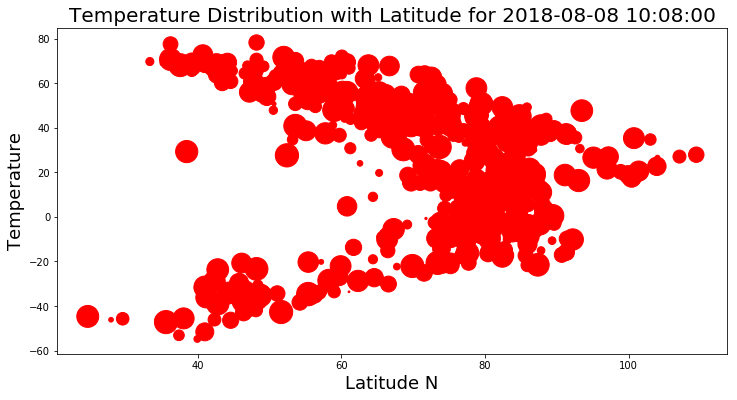

In [698]:
plt.figure(figsize=(12,6))
s = [n for n in range(len(weather_df['Temperature']))]
plt.scatter(weather_df['Temperature'],weather_df['Lat'],s=s,c='r')
plt.ylabel('Temperature', fontsize=18)
plt.xlabel('Latitude N', fontsize=18)
plt.title('Temperature Distribution with Latitude for ' + str(hdate), fontsize=20)
plt.show()

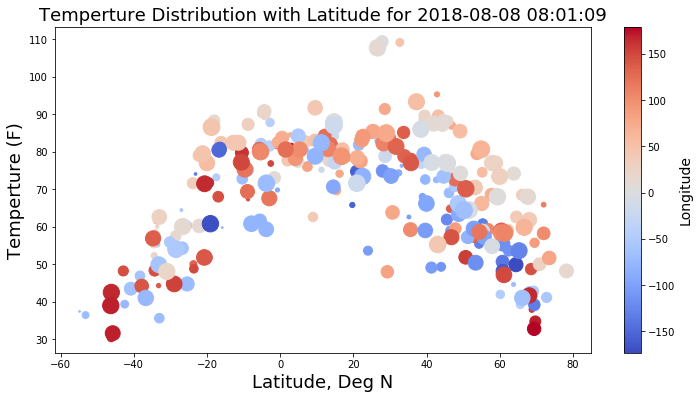

In [539]:


color_by = weather_df['Lng']
label = 'Longitude'  # Need to rename if 'color_by' is changed
max_color_by = max(color_by)
min_color_by = min(color_by)
s = [n for n in range(len(weather_df['Temperature']))]
fig, ax = plt.subplots(figsize=(12,6))
s = ax.scatter(weather_df['Lat'], weather_df['Temperature'],
               c=color_by,
               s=s,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.coolwarm,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label,fontsize=14)
plt.ylabel('Temperture (F)', fontsize=18)
plt.xlabel('Latitude, Deg N', fontsize=18)
plt.title('Temperture Distribution with Latitude for ' + str(hdate), fontsize=18)
plt.savefig("temp_dist.png", dpi = 100)
plt.show()

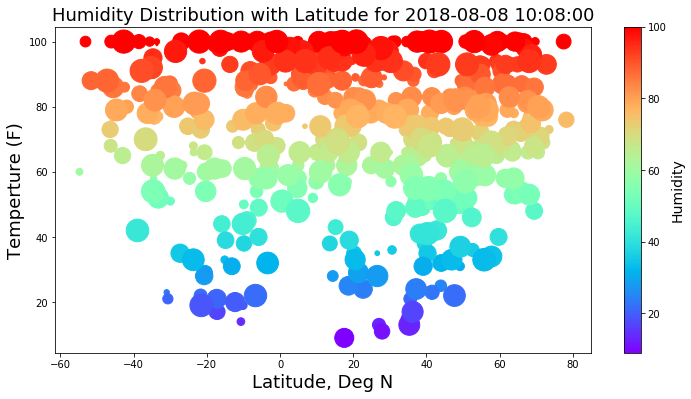

In [693]:
color_by = weather_df['Humidity']
label = 'Humidity'  # Need to rename if 'color_by' is changed
max_color_by = max(color_by)
min_color_by = min(color_by)
s = [n for n in range(len(weather_df['Humidity']))]
fig, ax = plt.subplots(figsize=(12,6))
s = ax.scatter(weather_df['Lat'], weather_df['Humidity'],
               c=color_by,
               s=s,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.rainbow,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label,fontsize=14)
plt.ylabel('Temperture (F)', fontsize=18)
plt.xlabel('Latitude, Deg N', fontsize=18)
plt.title('Humidity Distribution with Latitude for ' + str(hdate), fontsize=18)
plt.savefig("humid_dist.png", dpi = 100)
plt.show()

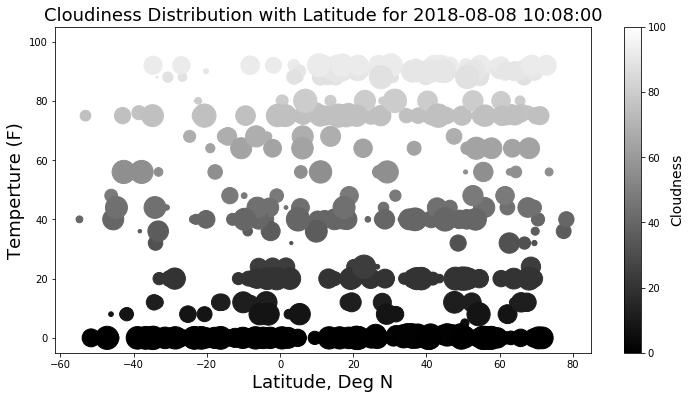

In [694]:
color_by = weather_df['Cloudiness']
label = 'Cloudness'  # Need to rename if 'color_by' is changed
max_color_by = max(color_by)
min_color_by = min(color_by)
s = [n for n in range(len(weather_df['Cloudiness']))]
fig, ax = plt.subplots(figsize=(12,6))
s = ax.scatter(weather_df['Lat'], weather_df['Cloudiness'],
               c=color_by,
               s=s,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.gray,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label,fontsize=14)
plt.ylabel('Temperture (F)', fontsize=18)
plt.xlabel('Latitude, Deg N', fontsize=18)
plt.title('Cloudiness Distribution with Latitude for ' + str(hdate), fontsize=18)
plt.savefig("cloud_dist.png", dpi = 100)
plt.show()

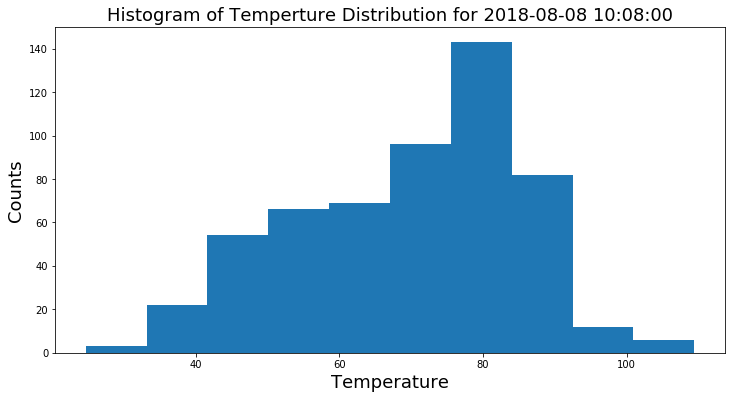

In [695]:
plt.figure(figsize=(12,6))
plt.hist(weather_df['Temperature'])
plt.ylabel ('Counts', fontsize=18)
plt.xlabel('Temperature', fontsize=18)
plt.title('Histogram of Temperture Distribution for ' + str(hdate), fontsize=18)
plt.savefig("histo_dist.png", dpi = 100)
plt.show()

/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


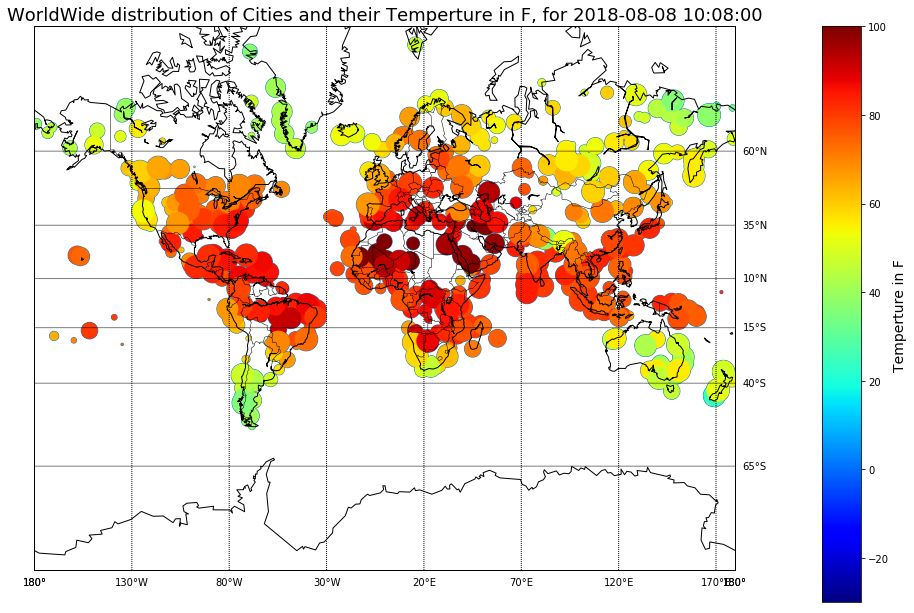

In [696]:
# Define the projection, scale, the corners of the map, and the resolution.
from matplotlib import cm
plt.figure(figsize=(18,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,25.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,50.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("WorldWide distribution of Cities and their Temperture in F, for " + str(hdate), fontsize=18)
# Color the transformed points!
x,y =m(lons,lats)
s = [n for n in range(len(weather_df['Temperature']))]

plt.scatter(x,y,s=s)

#sc = plt.scatter(weather_df['Lng'],weather_df['Lat'], c=weather_df['temp'], vmin=-30, vmax =100, cmap=jet, s=20, edgecolors='none')
sc = plt.scatter(x,y, c=weather_df['Temperature'], vmin=-30, vmax =100, cmap=cm.jet, s=s, edgecolors='none')# And let's include that colorbar
cax = plt.axes([0.85, 0.08, 0.030, 0.8])
clb=plt.colorbar(sc,cax=cax)
clb.set_label('Temperture in F', fontsize=14 )
plt.savefig("ww_temp_dist.png", dpi = 100)
plt.show()


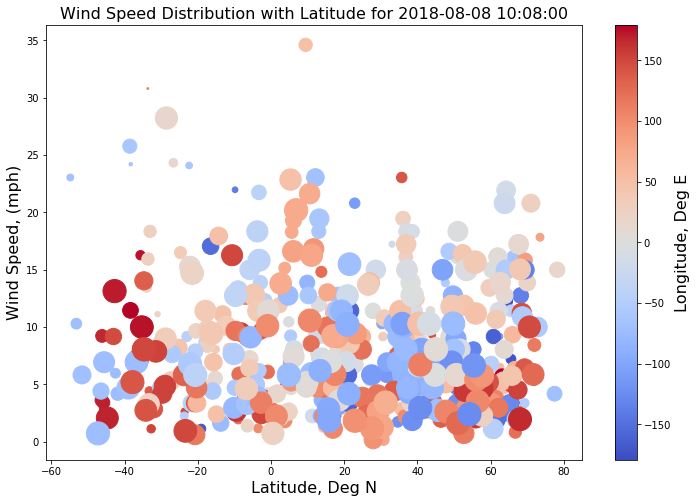

In [697]:

plt.figure(figsize=(20,12))
color_by = weather_df['Lng']
label = 'Longitude, Deg E'  # Need to rename if 'color_by' is changed
max_color_by = max(color_by)
min_color_by = min(color_by)
s = [n for n in range(len(weather_df['Temperature']))]
fig, ax = plt.subplots(figsize=(12,8))
s = ax.scatter(weather_df['Lat'], weather_df['Wind Speed'],
               c=color_by,
               s=s,
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.coolwarm,       # Color pallete
               vmin = min_color_by,          # Min value
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label, fontsize=16)

plt.ylabel('Wind Speed, (mph)', fontsize=16)
plt.xlabel('Latitude, Deg N', fontsize=16)
plt.title('Wind Speed Distribution with Latitude for ' + str(hdate), fontsize=16)
plt.savefig("wind_speed_dist.png", dpi = 100)
plt.show()